In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('data/pyrolysis.csv')

In [27]:
df.head()

,Index,Biomass species,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase
0,1,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,550,10.0,100.0,35,44.9,20.1
1,2,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,650,10.0,100.0,31.75,41.25,27
2,3,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,750,10.0,100.0,30.2,40.6,29.2
3,4,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,850,10.0,100.0,28.6,36.36,35.04
4,5,reed,5.89,8.47,72.12,13.52,42.78,5.17,50.51,1.33,0.5,550,10.0,100.0,32.85,54.38,12.77


In [28]:
print(df.dtypes)

Index                int64
Biomass species     object
M                  float64
Ash                float64
VM                 float64
FC                 float64
C                  float64
H                  float64
O                  float64
N                  float64
PS                  object
FT                   int64
HR                 float64
FR                 float64
Solid phase         object
Liquid phase        object
Gas phase           object
dtype: object


In [29]:
df.shape

(751, 17)

2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

In [ ]:
df["Solid phase"] = pd.to_numeric(df["Solid phase"], errors="coerce")
df["Liquid phase"] = pd.to_numeric(df["Liquid phase"], errors="coerce")
df["Gas phase"] = pd.to_numeric(df["Gas phase"], errors="coerce")
df["PS"] = pd.to_numeric(df["PS"], errors="coerce")

In [38]:
print(df.dtypes)

Index                int64
Biomass species     object
M                  float64
Ash                float64
VM                 float64
FC                 float64
C                  float64
H                  float64
O                  float64
N                  float64
PS                 float64
FT                   int64
HR                 float64
FR                 float64
Solid phase        float64
Liquid phase       float64
Gas phase          float64
dtype: object


<h3> Data Checks to perform</h3>
- Check Missing values <br>
- Check Duplicates <br>
- Check data type <br>
- Check the number of unique values of each column <br>
- Check statistics of data set <br>
- Check various categories present in the different categorical column <br>

In [32]:
df.isna().sum()

Index                0
Biomass species      0
M                  119
Ash                 18
VM                  68
FC                  68
C                    3
H                    3
O                    3
N                   30
PS                 101
FT                   0
HR                 110
FR                 181
Solid phase         12
Liquid phase        39
Gas phase           39
dtype: int64

Since there are missing values so we need to handle

<h3> Creating a Pipeline to handle missing values

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd




# Identify numerical features only
num_features = df.select_dtypes(exclude="object").columns.tolist()  # Selecting only numerical columns

# Store original dtypes
num_dtypes = df[num_features].dtypes  # Keep track of original data types

# **1️⃣ Numerical Pipeline (Handles Missing Values)**
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))  # Filling missing values with median
])

# **2️⃣ ColumnTransformer (Apply Only to Numerical Data)**
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features)  # Apply transformations only to numerical features
], remainder="passthrough")  # Keeps all other columns unchanged

# **3️⃣ Apply Transformations**
df_cleaned = pd.DataFrame(preprocessor.fit_transform(df), columns=num_features + [col for col in df.columns if col not in num_features])

# **4️⃣ Display Results**
print(df_cleaned.head())  # Check transformed data
print(df_cleaned.isnull().sum())  # Ensure missing values are handled


  Index      M  Ash      VM     FC      C     H      O     N     PS     FT  \
0   1.0  15.76  3.34   67.4   13.5  45.36  6.11  47.26  0.75   20.1  550.0   
1   2.0  15.76  3.34   67.4   13.5  45.36  6.11  47.26  0.75   27.0  650.0   
2   3.0  15.76  3.34   67.4   13.5  45.36  6.11  47.26  0.75   29.2  750.0   
3   4.0  15.76  3.34   67.4   13.5  45.36  6.11  47.26  0.75  35.04  850.0   
4   5.0   5.89  8.47  72.12  13.52  42.78  5.17  50.51  1.33  12.77  550.0   

     HR     FR Solid phase Liquid phase Gas phase            Biomass species  
0  10.0  100.0        35.0         44.9      20.1  Jerusalem artichoke stick  
1  10.0  100.0       31.75        41.25      27.0  Jerusalem artichoke stick  
2  10.0  100.0        30.2         40.6      29.2  Jerusalem artichoke stick  
3  10.0  100.0        28.6        36.36     35.04  Jerusalem artichoke stick  
4  10.0  100.0       32.85        54.38     12.77                       reed  
Index              0
M                  0
Ash            

We can see that missing values are handeled and is stored in new variable 'df_cleaned'

In [91]:
df_cleaned.describe()

,Index,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase,Biomass species
count,751.0,751.0,751.0,751.0,751.0,751.0,751.00,751.0,751.00,751.00,751.0,751.0,751.0,751.0,751.00,751.00,751
unique,751.0,96.0,118.0,116.0,114.0,119.0,99.00,118.0,105.00,621.00,32.0,19.0,24.0,630.0,623.00,621.00,98
top,1.0,5.7,5.5,74.9,14.3,62.1,6.12,24.9,1.46,26.98,500.0,20.0,100.0,28.6,39.98,26.98,rapeseed
freq,1.0,142.0,42.0,79.0,85.0,30.0,31.00,30.0,43.00,39.00,192.0,146.0,372.0,14.0,39.00,39.00,42


In [92]:
#since dtype got converted so:
for col in num_features:
    df_cleaned[col] = df_cleaned[col].astype(num_dtypes[col])

In [93]:
df_cleaned.dtypes

Index                int64
M                  float64
Ash                float64
VM                 float64
FC                 float64
C                  float64
H                  float64
O                  float64
N                  float64
PS                 float64
FT                   int64
HR                 float64
FR                 float64
Solid phase        float64
Liquid phase       float64
Gas phase          float64
Biomass species     object
dtype: object

In [94]:
df_cleaned.isnull().sum()

Index              0
M                  0
Ash                0
VM                 0
FC                 0
C                  0
H                  0
O                  0
N                  0
PS                 0
FT                 0
HR                 0
FR                 0
Solid phase        0
Liquid phase       0
Gas phase          0
Biomass species    0
dtype: int64

In [97]:
df_cleaned.drop(columns=["Index"], inplace=True)


<h2>3.2 Check Duplicates

In [98]:
print(df_cleaned[df_cleaned.duplicated(keep=False)])
print("Number of duplocates: " , df_cleaned.duplicated().sum())

       M  Ash     VM    FC     C    H      O    N    PS   FT    HR      FR  \
687  5.0   5.0  69.0  21.0  42.3  4.8  46.74  5.8  16.9  450  30.0  8000.0   
691  5.0   5.0  69.0  21.0  42.3  4.8  46.74  5.8  16.9  450  30.0  8000.0   
694  5.0   5.0  69.0  21.0  42.3  4.8  46.74  5.8  16.9  450  30.0  8000.0   

     Solid phase  Liquid phase  Gas phase                  Biomass species  
687         35.1          48.0       16.9  Jatropha curcas de oilseed cake  
691         35.1          48.0       16.9  Jatropha curcas de oilseed cake  
694         35.1          48.0       16.9  Jatropha curcas de oilseed cake  
Number of duplocates:  2


There are 2 duplicates

In [99]:
# Droping duplicates
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum()

0

<h2>3.3 Check data types

In [89]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 750
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   M                749 non-null    object
 1   Ash              749 non-null    object
 2   VM               749 non-null    object
 3   FC               749 non-null    object
 4   C                749 non-null    object
 5   H                749 non-null    object
 6   O                749 non-null    object
 7   N                749 non-null    object
 8   PS               749 non-null    object
 9   FT               749 non-null    object
 10  HR               749 non-null    object
 11  FR               749 non-null    object
 12  Solid phase      749 non-null    object
 13  Liquid phase     749 non-null    object
 14  Gas phase        749 non-null    object
 15  Biomass species  749 non-null    object
dtypes: object(16)
memory usage: 99.5+ KB


<h2>3.4 Checking the number of unique values of each column

In [100]:
df_cleaned.nunique()

M                   96
Ash                118
VM                 116
FC                 114
C                  119
H                   99
O                  118
N                  105
PS                 621
FT                  32
HR                  19
FR                  24
Solid phase        630
Liquid phase       623
Gas phase          621
Biomass species     98
dtype: int64

<h2>3.5 Check statistics of data set

In [101]:
df_cleaned.describe()

,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,6.041709,5.800975,73.728451,14.896889,47.770868,6.541255,43.371696,2.543672,27.652350,524.285714,36.399866,437.678238,29.665768,39.008238,27.652350
std,4.773444,5.297990,9.703796,6.098591,6.360615,1.714062,7.773380,3.193007,9.117313,130.417331,65.244844,1488.370580,8.628766,11.965027,9.117313
min,-100.000000,0.240000,5.820000,0.200000,22.490000,3.000000,24.900000,0.000000,5.980000,300.000000,0.000000,0.000000,4.810000,0.840000,5.980000
25%,5.000000,2.100000,71.100000,11.300000,44.410000,5.800000,39.100000,0.750000,21.800000,450.000000,10.000000,50.000000,24.600000,30.830000,21.800000
50%,5.700000,4.700000,74.900000,14.300000,47.280000,6.180000,44.700000,1.460000,26.980000,500.000000,20.000000,100.000000,28.600000,39.980000,26.980000
75%,7.270000,7.210000,78.830000,18.580000,51.170000,6.740000,48.280000,3.900000,33.070000,550.000000,30.000000,100.000000,33.930000,47.330000,33.070000
max,22.740000,29.510000,89.800000,39.340000,66.650000,21.200000,73.680000,22.500000,61.290000,1250.000000,700.000000,10000.000000,67.800000,68.190000,61.290000


<h2>3.7 Exploring Data


In [102]:
df_cleaned.head()

,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase,Biomass species
0,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,20.10,550,10.0,100.0,35.00,44.90,20.10,Jerusalem artichoke stick
1,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,27.00,650,10.0,100.0,31.75,41.25,27.00,Jerusalem artichoke stick
2,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,29.20,750,10.0,100.0,30.20,40.60,29.20,Jerusalem artichoke stick
3,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,35.04,850,10.0,100.0,28.60,36.36,35.04,Jerusalem artichoke stick
4,5.89,8.47,72.12,13.52,42.78,5.17,50.51,1.33,12.77,550,10.0,100.0,32.85,54.38,12.77,reed


<h2>4. Exploring Data ( Visualization ) 

In [104]:
import seaborn as sns
import matplotlib as plt

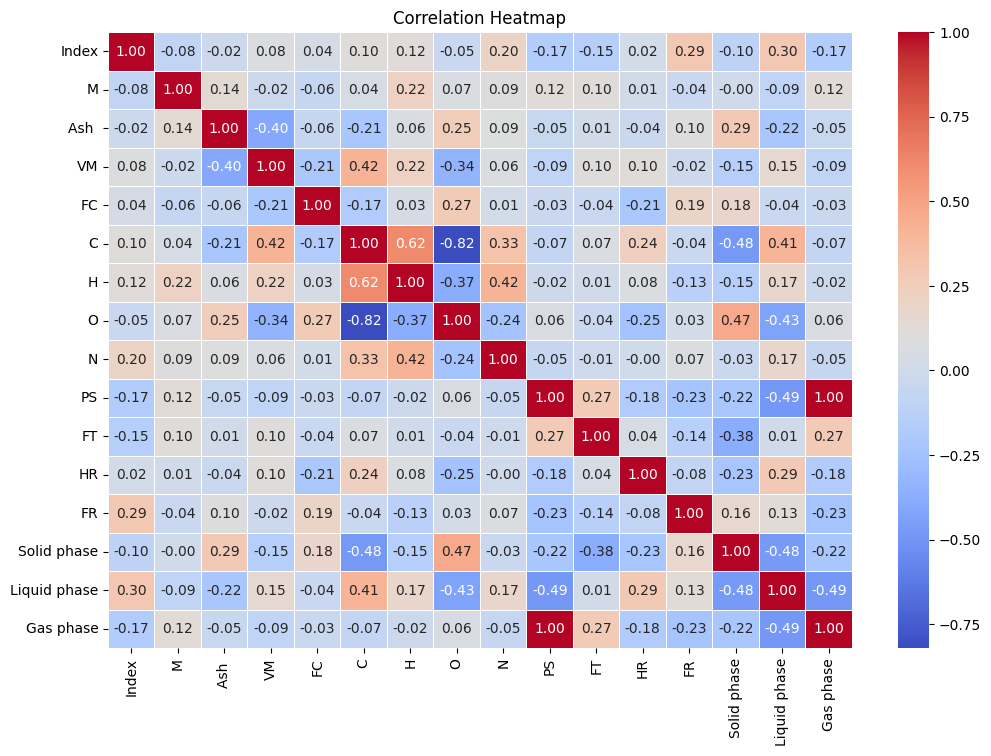

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (exclude categorical ones)
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()
